# Rolling Correlation

Correlation is one way to look at the co-movement between two time series. Since this relationship is constantly changing, you can use the rolling correlation to view this change. Below you can see the rolling correclation between the percentage change in daily returns for microsoft and apple. 
<br>

$$corr(X,Y) = \frac{cov(X,Y)}{\sigma_x\sigma_y} \\
= \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{(N-1)\sigma_x\sigma_y}$$

In [1]:
%matplotlib inline

from datetime import datetime
import pandas as pd
from pandas.tseries.offsets import BMonthEnd, Week

# Data and function definitions
dtEnd = datetime.today()
dtStart = datetime(dtEnd.year - 3, dtEnd.month, dtEnd.day)
maWindow = 50 

import quandl
auth_tok = "pgkyrfy64Yy5hxVi5Yd7"

#Set up dict with Dataset names, Quandl Codes, and empty lists for our data
diTickers = {'EOD/AAPL': 'Close', 'EOD/MSFT': 'Close'}
diTickers2 = {'EOD/AAPL': 'Close'}
dataDict = {}
source = "Quandl"

msft = quandl.get('EOD/MSFT', authtoken=auth_tok, trim_start=dtStart, trim_end=dtEnd)['Close']
aapl = quandl.get('EOD/AAPL', authtoken=auth_tok, trim_start=dtStart, trim_end=dtEnd)['Close']
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

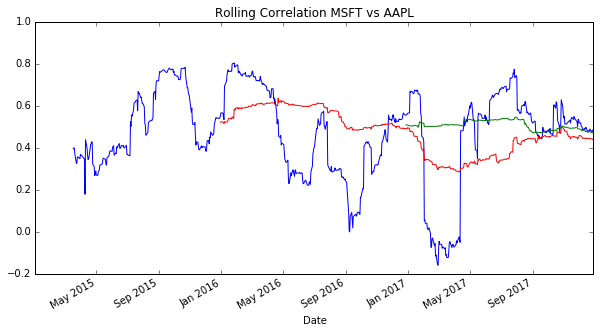

In [3]:
aapl_rets.rolling(50).corr(msft_rets).plot(figsize=(10,5), grid=True, title='Rolling Correlation MSFT vs AAPL')
aapl_rets.rolling(250).corr(msft_rets).plot(color='r')
#also, note that as you widen the corr window, the correlations become more normalized like a moving avg
aapl_rets.rolling(500).corr(msft_rets).plot(color='g')

## Note

One issue with correlation between two assets is that it does not capture differences in volatility. Least-squares regression provides another means for modeling the dynamic relationship between a variable and one or more other predictor variables.

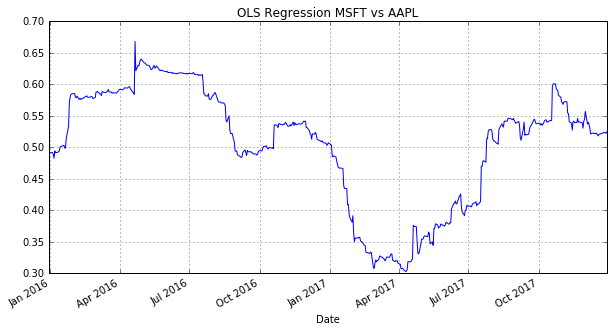

In [4]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta['MSFT'].plot(figsize=(10,5), grid=True, title='OLS Regression MSFT vs AAPL', legend=False)

### Resources

http://www.statsmodels.org/stable/regression.html
